In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime

Wariant 12


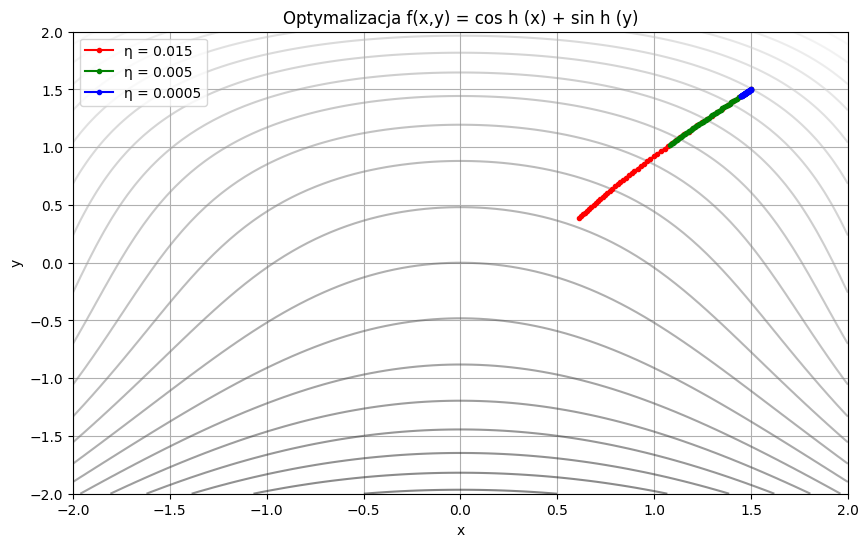

In [6]:
def fn(x, y):
    return np.cosh(x) + np.sinh(y)


def gradient(x, y):
    dx = np.sinh(x)
    dy = np.cosh(y)  
    return np.array([dx, dy])


# 'Opadający gradient'
def optimize(eta, steps=50):
    pos = np.array([1.5, 1.5])
    path = [pos.copy()]

    for _ in range(steps):
        grad = gradient(pos[0], pos[1])
        pos = pos - eta * grad
        path.append(pos.copy())
    return np.array(path)


learning_rates = [0.015, 0.005, 0.0005]

x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = fn(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=20, cmap="gray", alpha=0.5)

colors = ["r", "g", "b"]
for lr, color in zip(learning_rates, colors):
    path = optimize(lr)
    plt.plot(path[:, 0], path[:, 1], "o-", label=f"η = {lr}", color=color, markersize=3)

print("Wariant 12")
plt.title("Optymalizacja f(x,y) = cos h (x) + sin h (y)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

def create_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu', name='Warstwa_1'),
        layers.Dense(64, activation='relu', name='Warstwa_2'),
        layers.Dense(10, activation='softmax', name='Warstwa_wyj')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

# 3. Konfiguracja TensorBoard
log_dir = "logs/12/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, 
    histogram_freq=1,
    write_graph=True
)

print(f"Logi: {log_dir}")
model.fit(x_train, y_train, 
          epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Logi: logs/12/20260114-133129
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8665 - loss: 0.4449 - val_accuracy: 0.9602 - val_loss: 0.1271
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9675 - loss: 0.1061 - val_accuracy: 0.9691 - val_loss: 0.1005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9773 - loss: 0.0716 - val_accuracy: 0.9755 - val_loss: 0.0783
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9838 - loss: 0.0520 - val_accuracy: 0.9718 - val_loss: 0.0903
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9860 - loss: 0.0423 - val_accuracy: 0.9721 - val_loss: 0.0925
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9776 - val_loss: 0.0760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0.9762 - val_loss: 0.0889
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc